In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
##for statistical tests
import scipy.stats as stats
#for splitting the data
from sklearn.model_selection import train_test_split



##FOR MODELLING
from sklearn.ensemble import RandomForestClassifier
#from lightgbm import LBMBClassifier


In [3]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import ConfusionMatrixDisplay,f1_score,recall_score,precision_score


In [4]:
df=pd.read_csv('hotel_bookings.csv')

In [5]:
df.head(20)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.00,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.00,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.00,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.50,0,0,Canceled,2015-04-22


# exploring the data

In [6]:
df.shape


(119390, 32)

In [7]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [8]:
###info of th data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [9]:
##summay statistics
df.describe()


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [10]:
df.corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.293123,0.016660,0.008148,-0.006130,-0.001791,0.024765,0.060017,0.005048,-0.032491,-0.084793,0.110133,-0.057358,-0.144381,-0.083114,-0.020642,0.054186,0.047557,-0.195498,-0.234658
lead_time,0.293123,1.000000,0.040142,0.126871,0.002268,0.085671,0.165799,0.119519,-0.037622,-0.020915,-0.124410,0.086042,-0.073548,0.000149,-0.069741,0.151464,0.170084,-0.063077,-0.116451,-0.095712
arrival_date_year,0.016660,0.040142,1.000000,-0.540561,-0.000221,0.021497,0.030883,0.029635,0.054624,-0.013192,0.010341,-0.119822,0.029218,0.030872,0.063457,0.259095,-0.056497,0.197580,-0.013684,0.108531
arrival_date_week_number,0.008148,0.126871,-0.540561,1.000000,0.066809,0.018208,0.015558,0.025909,0.005518,0.010395,-0.030131,0.035501,-0.020904,0.005508,-0.031201,-0.076760,0.022933,0.075791,0.001920,0.026149
arrival_date_day_of_month,-0.006130,0.002268,-0.000221,0.066809,1.000000,-0.016354,-0.028174,-0.001566,0.014544,-0.000230,-0.006145,-0.027011,-0.000300,0.010613,0.001487,0.044858,0.022728,0.030245,0.008683,0.003062
stays_in_weekend_nights,-0.001791,0.085671,0.021497,0.018208,-0.016354,1.000000,0.498969,0.091871,0.045793,0.018483,-0.087239,-0.012775,-0.042715,0.063281,0.140739,0.066749,-0.054151,0.049342,-0.018554,0.072671
stays_in_week_nights,0.024765,0.165799,0.030883,0.015558,-0.028174,0.498969,1.000000,0.092976,0.044203,0.020191,-0.097245,-0.013992,-0.048743,0.096209,0.182382,0.182211,-0.002020,0.065237,-0.024859,0.068192
adults,0.060017,0.119519,0.029635,0.025909,-0.001566,0.091871,0.092976,1.000000,0.030447,0.018146,-0.146426,-0.006738,-0.107983,-0.051673,-0.035594,0.207793,-0.008283,0.230641,0.014785,0.122884
children,0.005048,-0.037622,0.054624,0.005518,0.014544,0.045793,0.044203,0.030447,1.000000,0.024030,-0.032859,-0.024730,-0.021072,0.048949,0.041066,0.030931,-0.033273,0.324854,0.056253,0.081745
babies,-0.032491,-0.020915,-0.013192,0.010395,-0.000230,0.018483,0.020191,0.018146,0.024030,1.000000,-0.008943,-0.007501,-0.006550,0.083440,0.036184,0.019206,-0.010621,0.029186,0.037383,0.097889


<AxesSubplot:>

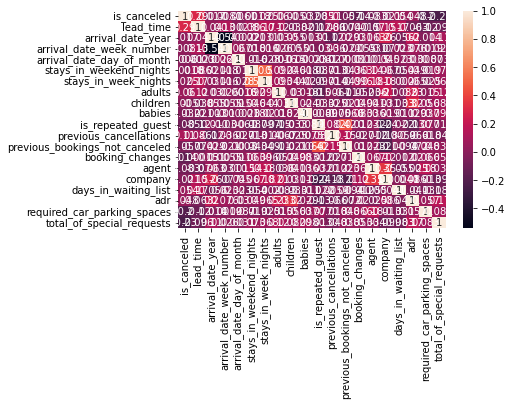

In [11]:
#plt.figure(fig=(10,10))
sns.heatmap(df.corr(),annot=True)

# data cleansing

In [12]:
##checking for null values

In [13]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [14]:
df.isnull().sum()[df.isnull().sum()>0]

children         4
country        488
agent        16340
company     112593
dtype: int64

#### four columns are with null values 
###agent,company,country,children

In [15]:
###checking class imbalance in the target variable
df.is_canceled.value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

###### the data is fairly balanced

<BarContainer object of 2 artists>

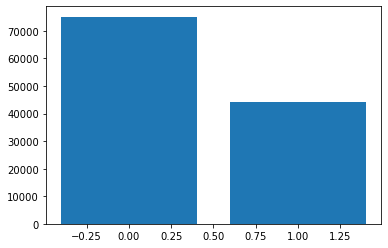

In [16]:
plt.bar(df.is_canceled.value_counts().keys(),df.is_canceled.value_counts().values)

In [17]:
df.is_canceled.value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

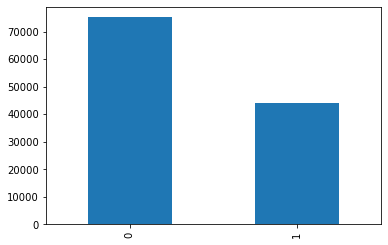

In [18]:
##using alternate command to show the barplot
df.is_canceled.value_counts().plot.bar()
plt.show()
####the data imbalance seems to be minimum 
### for now we don't seem to be needing balancing the target variable


#### Handinling of missing values


In [19]:
df.isnull().sum()[df.isnull().sum()>0]
#Cheking columnsb which have missing values

children         4
country        488
agent        16340
company     112593
dtype: int64

In [20]:
###now we will fill the agent column
##we see that other than the missing values we agent ids
### we will fill the missing value with "no agent " and the agent ids with 
#'agent'

In [21]:
df.agent.isnull().sum(),len(df.agent)

(16340, 119390)

In [22]:
df.agent.value_counts()

9.0      31961
240.0    13922
1.0       7191
14.0      3640
7.0       3539
         ...  
289.0        1
432.0        1
265.0        1
93.0         1
304.0        1
Name: agent, Length: 333, dtype: int64

In [23]:
#filling of non null values with 'agent'
df.loc[df.agent.isnull()==False,'agent']='Agent'
print(df.agent.value_counts(),"...............",len(df.agent))
print(df.agent.isnull().sum())

Agent    103050
Name: agent, dtype: int64 ............... 119390
16340


In [24]:
###now we will fill the null values with "NO agent"
df.agent.fillna('no agent',inplace=True)

<AxesSubplot:>

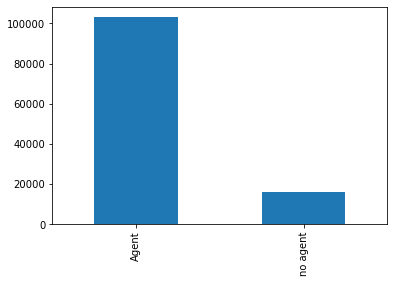

In [25]:
df.agent.value_counts().plot.bar()

In [26]:
###now we will fill the missing values in the country columns with "un known "

##since we do not seem to find any reference to other columns

df.country.fillna('unknown',inplace=True)


In [27]:
df.isnull().sum()[df.isnull().sum()>0]

children         4
company     112593
dtype: int64

In [28]:
###we will fill the missing values in the children column with 0
df.children.fillna('none',inplace=True)

In [29]:
df.isnull().sum()[df.isnull().sum()>0]

company    112593
dtype: int64

In [30]:
x=(df.company.isnull().sum())/(len(df.company))
print(x%100,"of the column are null values")
print("we are dropping company column")

0.943068933746545 of the column are null values
we are dropping company column


In [31]:
df.drop('company',axis=1,inplace=True)


In [32]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [33]:
###searching for duplicated rows
len(df.duplicated())


119390

In [34]:
df=df.drop_duplicates(keep='first').reset_index().drop(columns='index')
df.shape

(87376, 31)

In [35]:
len(df.duplicated())

87376

In [36]:
# Before doing our univariate analysis we would change the datatypes of columns to their correct datatype
df.arrival_date_year=df.arrival_date_year.astype(object)

In [37]:
len(df.country.unique())

178

In [38]:
# We would bin the country column in its respective continents
europe=['PRT','GBR','ESP','IRL','FRA','ROU','NOR','POL','DEU','BEL','CHE','GRC','ITA','NLD','DNK','RUS','SWE','EST',
       'CZE','FIN','LUX','SVN','ALB','UKR','SMR','LVA','SRB','AUT','BLR','LTU','TUR','HUN','HRV','GEO','AND','SVK',
       'MKD','BIH','BGR','MLT','ISL','MCO','LIE','MNE']

north_a=['USA','MEX','PRI','CRI','CUB','HND','NIC','GAB','PAN','SLV','GTM']

south_a=['ARG','BRA','CHL','URY','COL','VEN','SUR','PER','ECU','BOL','PRY','GUY']

asia=['OMN','CN','IND','CHN','ISR','KOR','ARE','HKG','IRN','CYP','KWT','MDV','KAZ','PAK','IDN','LBN','PHL','AZE','BHR',
     'THA','MYS','ARM','JPN','LKA','JOR','SYR','SGP','SAU','VNM','QAT','UZB','NPL','MAC','TWN','IRQ','KHM','BGD','TJK',
     'TMP','MMR','LAO']

africa=['MOZ','BWA','MAR','ZAF','AGO','ZMB','ZWE','DZA','TUN','CAF','NGA','SEN','SYC','CMR','MUS','COM','UGA','CIV',
       'BDI','EGY','MWI','MDG','TGO','DJI','STP','ETH','RWA','BEN','TZA','GHA','KEN','GNB','BFA','LBY','MLI','NAM',
       'MRT','SDN','SLE']

australia=['AUS']

Others=['CYM','CPV','JAM','GIB','JEY','GGY','FJI','NZL','DOM','PLW','BHS','KNA','IMN','VGB','GLP','UMI','MYT','FRO',
       'BRB','ABW','AIA','DMA','PYF','LCA','ATA','ASM','NCL','KIR','ATF']

unk=['Unknown']

In [39]:
def country_bin(x):
    if x in europe:
        return 'Europe'
    elif x in north_a:
        return 'North America'
    elif x in south_a:
        return 'South America'
    elif x in asia:
        return 'Asia'
    elif x in africa:
        return 'Africa'
    elif x in australia:
        return 'Australia'
    elif x in Others:
        return 'Others'
    elif x in unk:
        return 'Unknown'
df.country=df.country.apply(country_bin) #Binning the country column

In [40]:
df.country.unique()

array(['Europe', 'North America', None, 'Asia', 'South America',
       'Australia', 'Africa', 'Others'], dtype=object)

##### Reservation status is basically a column which will be filled after the event is occuring. So from a business perspective to need to be able to predict before the the confirmation from the customer. This column is going to be filled only filled when the confirmation from the customer is already given. So we need to exclude this column when model building

In [41]:
df.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,no agent,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,no agent,0,Transient,0.0,0,0,Check-Out,2015-07-01


## Exploratory data analysis

#### Column: Hotel

([<matplotlib.patches.Wedge at 0x92335fc2e0>,
 [Text(-0.3770231547592488, 1.033369992198043, 'City Hotel'),
  Text(0.4455728192609303, -1.2212554453249602, 'Resort Hotel')],
 [Text(-0.20564899350504479, 0.5636563593807508, '61.14%'),
  Text(0.27419865800672627, -0.7515418125076677, '38.86%')])

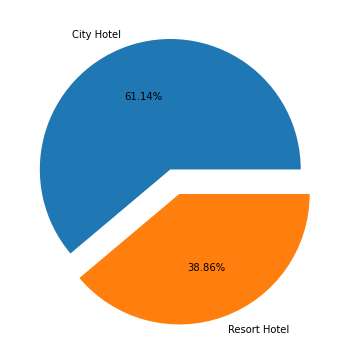

In [42]:
####df.hotel.value_counts().plot.pie(autopct='%.2f%%')
##method 2
plt.figure(figsize=(6,6))
plt.pie(df.hotel.value_counts().values,explode=[0,0.2],labels=df.hotel.value_counts().index,autopct='%.2f%%')

#### There are more booking in city hotel compared to resort hotel


<AxesSubplot:xlabel='is_canceled', ylabel='hotel'>

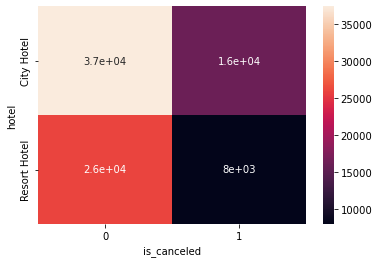

In [43]:
x=pd.crosstab(df.hotel,df.is_canceled)
sns.heatmap(x,annot=True)

<AxesSubplot:xlabel='hotel'>

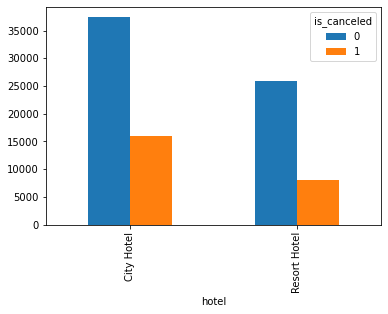

In [44]:
pd.crosstab(df.hotel,df.is_canceled).plot.bar()

##### We see that there are more cancellations in city hotels. But this could be because there are more records regarding city hotels. We would need to see the percentage of the records accordingly.

In [45]:
tbl=pd.crosstab(df.hotel,df.is_canceled,margins=True)
tbl

is_canceled,0,1,All
hotel,,,
City Hotel,37371,16047,53418
Resort Hotel,25984,7974,33958
All,63355,24021,87376


In [46]:
tbl['cancel%']=tbl[1]*100/tbl['All']

tbl

is_canceled,0,1,All,cancel%
hotel,,,,
City Hotel,37371,16047,53418,30.040436
Resort Hotel,25984,7974,33958,23.481948
All,63355,24021,87376,27.491531


<AxesSubplot:xlabel='hotel'>

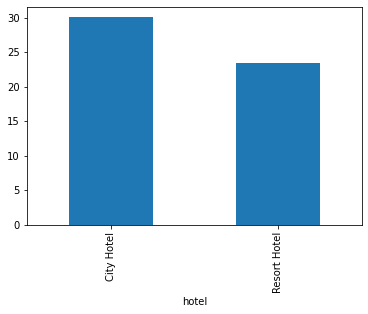

In [47]:
tbl.drop('All',axis=0)['cancel%'].plot.bar()

###### Column: Lead time

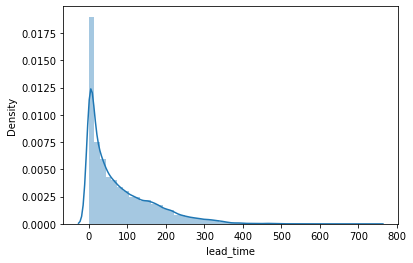

In [48]:
sns.distplot(df.lead_time)
plt.show()

###### we see the most of the records are between 0 and 200 .Higher lead time could indicate that some records are booked for occasions and preplanned events

<AxesSubplot:xlabel='is_canceled', ylabel='lead_time'>

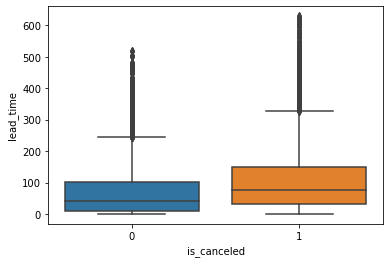

In [49]:
sns.boxplot(x='is_canceled',y='lead_time',data=df.loc[df.hotel=='City Hotel'])

##### From the above boxplots we infer that checked out bookings have a higher max lead time in resort hotels. But on average canceled bookings seem to be having higher lead time in resort hotels

##### column:arrival data year
    


In [50]:
df.arrival_date_year

0        2015
1        2015
2        2015
3        2015
4        2015
         ... 
87371    2017
87372    2017
87373    2017
87374    2017
87375    2017
Name: arrival_date_year, Length: 87376, dtype: object

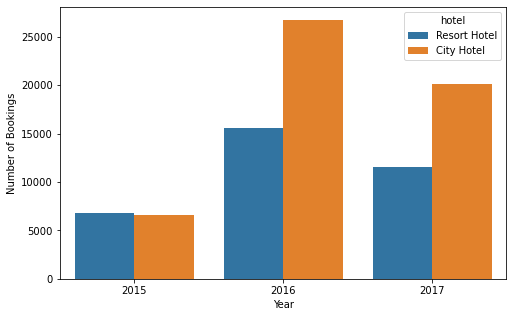

In [51]:
plt.rcParams['figure.figsize']=[8,5]
sns.countplot(x='arrival_date_year',data=df,hue='hotel')
plt.xlabel('Year')
plt.ylabel('Number of Bookings')
plt.show()

##### From the above barplots we see that 2016 had the highest number of bookings. While 2015 had the least. This could imply that these hotels could newer and established around 2015.

In [52]:
##we will now check year wise cancellation rate
tbl=pd.crosstab(df.arrival_date_year,df.is_canceled,margins=True)
tbl

is_canceled,0,1,All
arrival_date_year,,,
2015,10605,2702,13307
2016,31176,11207,42383
2017,21574,10112,31686
All,63355,24021,87376


In [53]:
#tbl['percentage']=(tbl[1]/tbl['All'])*100
#tbl.drop("All",axis=1,inplace=True)
tbl

is_canceled,0,1,All
arrival_date_year,,,
2015,10605,2702,13307
2016,31176,11207,42383
2017,21574,10112,31686
All,63355,24021,87376


In [54]:
#tbl.drop('All')['percentage'].plot.bar()
#plt.title('cancellation across 2015,2016')

In [55]:
df[df.is_canceled==1]['arrival_date_year'].value_counts()/len(df[df.is_canceled==1])

2016    0.466550
2017    0.420965
2015    0.112485
Name: arrival_date_year, dtype: float64

##### We see that 2017 had the highest cancellation percentage compared to 2015 and 2016. This may be due to some issues with the hotels in 2016, possibly overbooking and customer dissatisfaction. This could also be because of a bit of degraded customer support on the part of the hotels. Also we see that the cancel percentage increases with each passing year. This again could be indication of an overbooking problem

##### Column: arrival date month

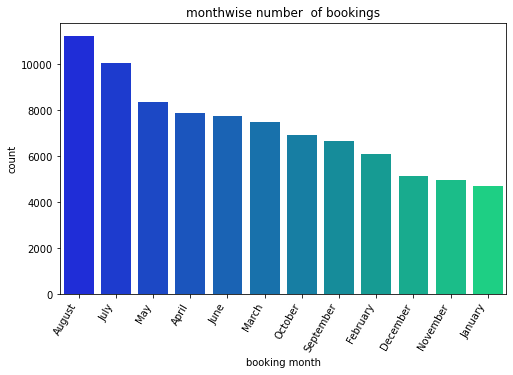

In [56]:
plt.rcParams['figure.figsize']=[8,5]
sns.countplot(x='arrival_date_month',data=df,order=df.arrival_date_month.value_counts().index,
             palette='winter')
plt.title('monthwise number  of bookings')
plt.xlabel ('booking month')
plt.xticks(rotation=60,ha='right')
plt.show()

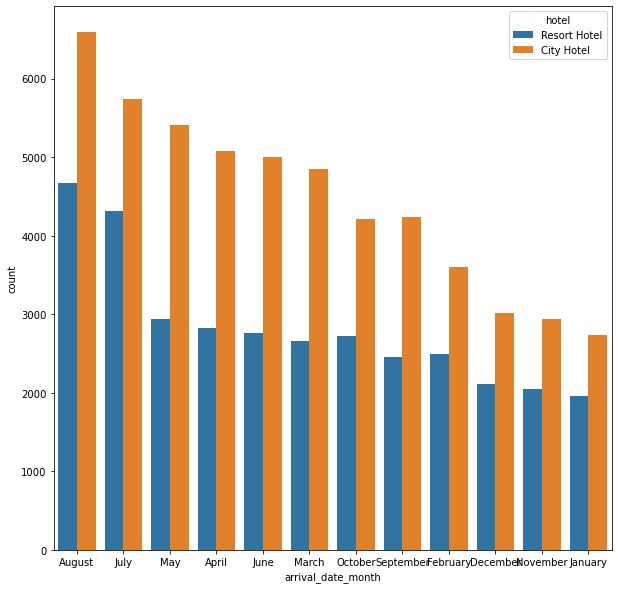

In [57]:
plt.figure(figsize=(10,10))
sns.countplot(x='arrival_date_month',data=df,hue='hotel',order=df.arrival_date_month.value_counts().index)
plt.show()

##### We see that August and July have the highest number of bookings compared to any other month. There could be some kind of festival or carnivals that are a major tourist attraction during these months. This could also be because of school vacations during August and July. This could also mean more crowds and festivities in this month.

In [58]:
df.arrival_date_month.value_counts()

August       11254
July         10055
May           8353
April         7907
June          7764
March         7511
October       6934
September     6688
February      6097
December      5129
November      4992
January       4692
Name: arrival_date_month, dtype: int64

In [59]:
tbl=pd.crosstab(df.arrival_date_month,df.is_canceled,margins=True)
tbl


is_canceled,0,1,All
arrival_date_month,,,
April,5498,2409,7907
August,7633,3621,11254
December,3751,1378,5129
February,4682,1415,6097
January,3654,1038,4692
July,6857,3198,10055
June,5411,2353,7764
March,5681,1830,7511
May,5911,2442,8353


In [60]:
##total cancellation percentage
tbl['percentage']=(tbl[1]/tbl['All'])*100
tbl

is_canceled,0,1,All,percentage
arrival_date_month,,,,
April,5498,2409,7907,30.466675
August,7633,3621,11254,32.175227
December,3751,1378,5129,26.866836
February,4682,1415,6097,23.208135
January,3654,1038,4692,22.122762
July,6857,3198,10055,31.805072
June,5411,2353,7764,30.306543
March,5681,1830,7511,24.364266
May,5911,2442,8353,29.235005


<AxesSubplot:xlabel='arrival_date_month'>

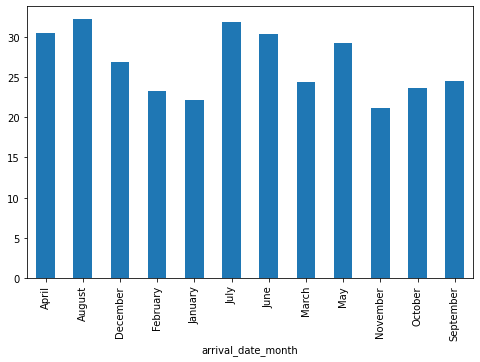

In [61]:
tbl.drop('All')['percentage'].plot.bar()

##### We see that August has the highest cancellation percentage compared to any other month. This again indicates towards overbooking and rushed bookings during fesitivites times and vacations.

##### Column: arrival date week number

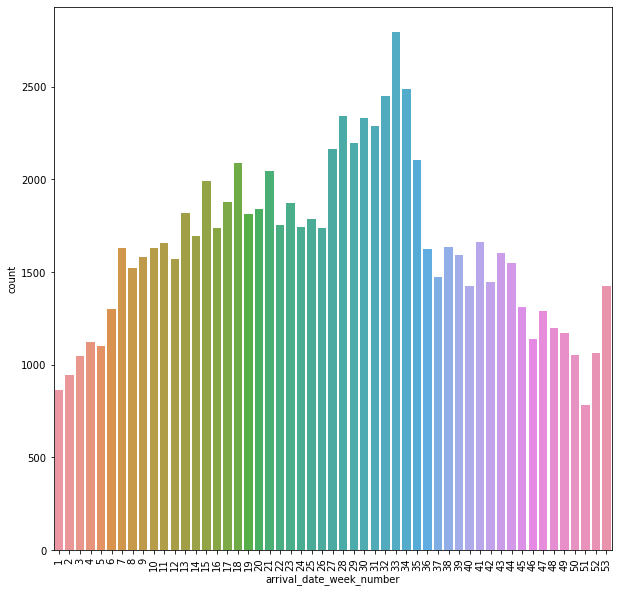

In [62]:
plt.figure(figsize=(10,10))
sns.countplot(df['arrival_date_week_number'])
plt.xticks(rotation='vertical')
plt.show()

##### We see that week number 33 has the highest number of bookings compared to any other week. This week lies around the time of august which further supports the idea that we have festivities and vacations during the month of August. Also we see that there are considerably less number of bookings towards the end of the year, especially during week 51 which usually falls in December during the time of Christmas.

##### Column: stays in weekend nights

<AxesSubplot:xlabel='stays_in_weekend_nights', ylabel='Density'>

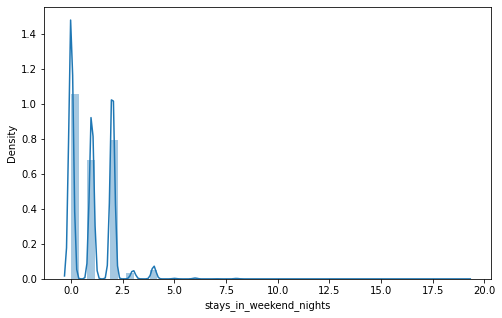

In [63]:
df['stays_in_week_nights']
sns.distplot(df.stays_in_weekend_nights)

##### Most people stay for shorter stays in the hotels with the usual number being between 0 and 5. This means a month long vacation could be the most popular vacation and trip type in these hotels. There are records with longer stays. This could be about people visiting on longer project and work related corporate trips which extend to many months.

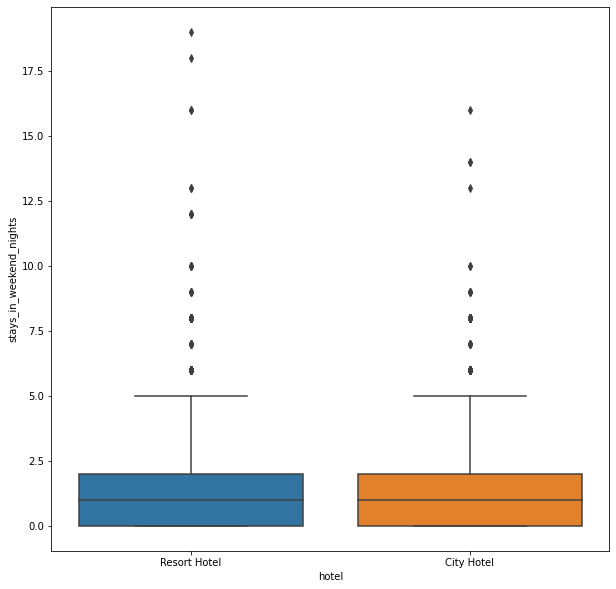

In [64]:
plt.figure(figsize=(10,10))
sns.boxplot(x='hotel',y='stays_in_weekend_nights',data=df)
plt.show()

###### We see that resort hotel usually has a higher stays in weekend nights compared to city hotel. Since resort hotels are usuaaly located near tourist attractions, beaches and forests, this could mean that work related trips could be for environmental studies or historical studies.

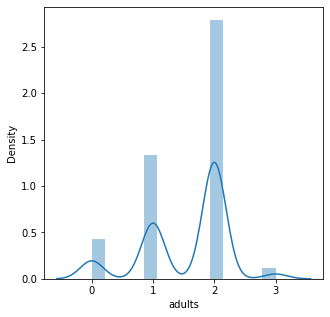

In [65]:
plt.figure(figsize=(5,5))
sns.distplot(df.loc[(df.stays_in_week_nights==0)&(df.stays_in_weekend_nights==0)]['adults'])
plt.show()

###### We observed that there are records containing 0 weekend stays, and 0 week nights stays and see that the number of adults in these is usually in small numbers. This could be couples,solo short trips. Records with 2 number of adults could indicate wedding aniversaries, birthdays. In these cases couples could be enjoying a casual stay in the hotels for a few hours for celebrations

###### Column: Babies

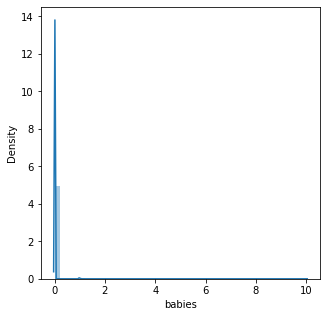

In [66]:
plt.figure(figsize=(5,5))
sns.distplot(df.babies)
plt.show()

###### We see that maximum records have 0 children. This indicates tha maximum trips are corporate, solo, couple and casual trips. There some records with higher number of babies which could mean presence of joint families on family trips.
We also see a similar pattern with the number of children column as well

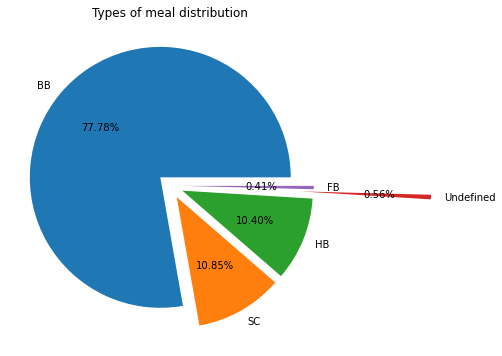

In [67]:
plt.figure(figsize=(8,6))
plt.pie(df.meal.value_counts().values,explode=[0.1,0.1,0.1,1,0.1],labels=df.meal.value_counts().index,autopct='%.2f%%')
plt.title('Types of meal distribution')
plt.show()

##### We see that most people order for a Bed and Breakfast meal package. Very few people go for a full board meal package. This could indicate the presence of popular restaurents around the hotels. A large number of people have ordered a no meal package as well. This further indicates the presence of popular restaurents around the hotels.

###### b###### Column: country

In [68]:

df.country.value_counts()

Europe           77516
Asia              3425
South America     2446
North America     2005
Africa             995
Australia          378
Others             159
Name: country, dtype: int64

<AxesSubplot:xlabel='country', ylabel='count'>

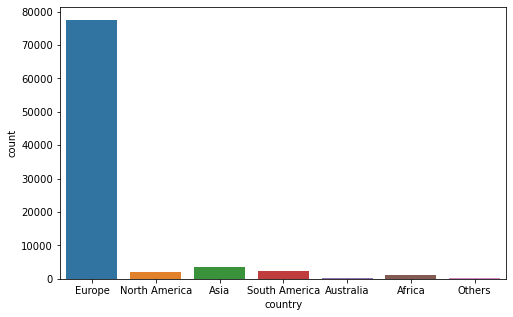

In [69]:
sns.countplot(df.country)

In [70]:
tbl=pd.crosstab(df.country,df.is_canceled,margins=True)
tbl
tbl['cancelleations']=(tbl[1]/tbl['All'])*100
tbl

is_canceled,0,1,All,cancelleations
country,,,,
Africa,559,436,995,43.819095
Asia,2284,1141,3425,33.313869
Australia,286,92,378,24.338624
Europe,56572,20944,77516,27.018938
North America,1531,474,2005,23.640898
Others,106,53,159,33.333333
South America,1599,847,2446,34.627964
All,62937,23987,86924,27.595371


<AxesSubplot:xlabel='country'>

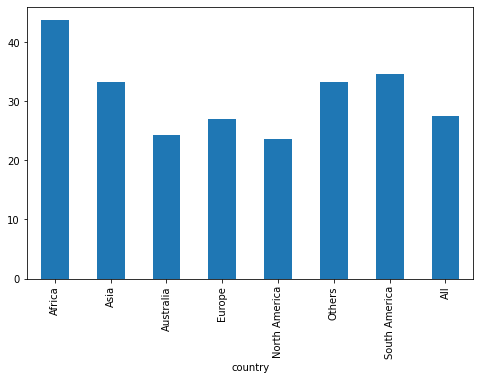

In [71]:
tbl.drop('All',axis=1)['cancelleations'].plot.bar()


###### We see that Africa has the highest rate of cancellation. Issues could be originating from issues with Visas(a hotel booking is mandatory for applying for a Portuguese entry visa) because some strict rules in the European Union(cancellation percentage in considerably less amongst European countries). Amongst the known continents, customers from North America seems to be having the least percentage of cancellation.

###### column market segment

<AxesSubplot:xlabel='market_segment', ylabel='count'>

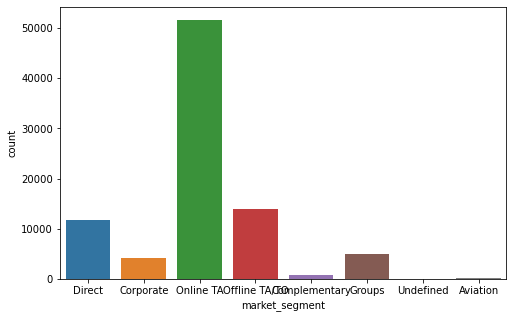

In [72]:
sns.countplot(x='market_segment',data=df)


###### We see that most of the records are through Online Travel Agents indicating a strong presence of online travel agents with a strong network in Portugal. There are also records with market_segment as Aviation. These records could be of different flight crews and their stays in these hotels. There are some complementary segments as well. It could indicate a few cases of complaints from the end of customers. This could also indicate a policy of reimbursment or compensation on the part of the hotels.

In [73]:
tbl=pd.crosstab(df.market_segment,df.is_canceled,margins=True)
tbl

is_canceled,0,1,All
market_segment,,,
Aviation,182,45,227
Complementary,614,88,702
Corporate,3698,510,4208
Direct,10067,1737,11804
Groups,3606,1335,4941
Offline TA/TO,11822,2060,13882
Online TA,33366,18244,51610
Undefined,0,2,2
All,63355,24021,87376


In [74]:
tbl['cancel_percent']=tbl[1]*100/tbl['All']
tbl

is_canceled,0,1,All,cancel_percent
market_segment,,,,
Aviation,182,45,227,19.823789
Complementary,614,88,702,12.535613
Corporate,3698,510,4208,12.119772
Direct,10067,1737,11804,14.715351
Groups,3606,1335,4941,27.018822
Offline TA/TO,11822,2060,13882,14.839360
Online TA,33366,18244,51610,35.349738
Undefined,0,2,2,100.000000
All,63355,24021,87376,27.491531


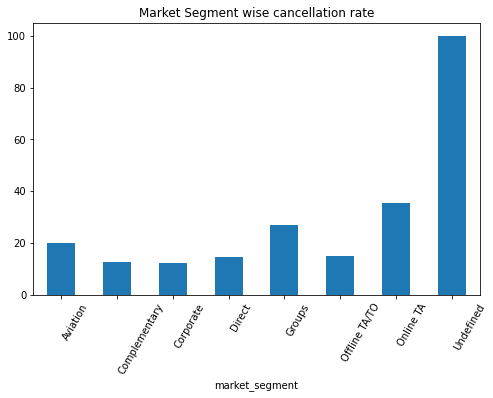

In [75]:
tbl.drop('All',axis=0)['cancel_percent'].plot.bar()
plt.title('Market Segment wise cancellation rate')
plt.xticks(rotation=60,ha='left')
plt.show()

###### We see that undefined market segment has the highest cancellation rate. But there are only two records where market segment was undefined. Among the other market segments, cancellation rates were highest in the online TA segments.

###### Column: Distribution channel

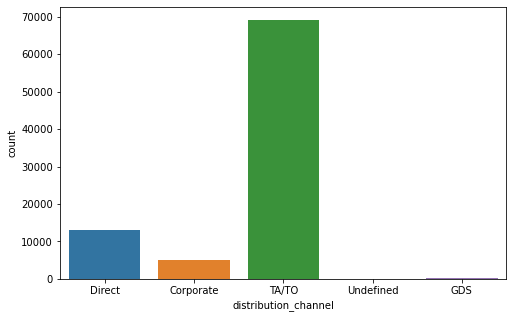

In [76]:
sns.countplot(x='distribution_channel',data=df)
plt.show()

In [77]:
tbl=pd.crosstab(df.distribution_channel,df.is_canceled,margins=True)
tbl

is_canceled,0,1,All
distribution_channel,,,
Corporate,4429,648,5077
Direct,11063,1925,12988
GDS,145,36,181
TA/TO,47717,21408,69125
Undefined,1,4,5
All,63355,24021,87376


In [78]:
tbl['cancel_percent']=tbl[1]*100/tbl['All']
tbl

is_canceled,0,1,All,cancel_percent
distribution_channel,,,,
Corporate,4429,648,5077,12.763443
Direct,11063,1925,12988,14.821374
GDS,145,36,181,19.889503
TA/TO,47717,21408,69125,30.969982
Undefined,1,4,5,80.000000
All,63355,24021,87376,27.491531


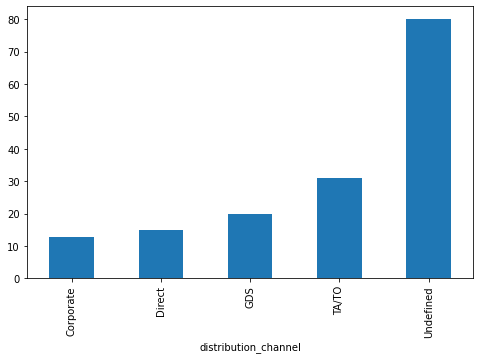

In [79]:
tbl.drop('All',axis=0)['cancel_percent'].plot.bar()
plt.show()

###### We see that undefined distribution channel has the highest cancellation percentage. But there are only 5 records of undefined distribution channel. Among the defined distribution channels Travel agents and tour operators seem to have the highest cancellation rates. Corporate bookings have the least cancellation rates among all the distribution channels.

###### Column: is_repeated_guest¶

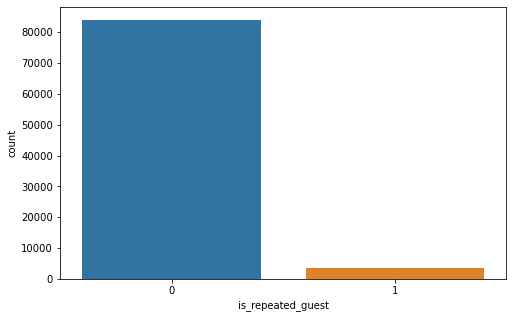

In [80]:
sns.countplot(x='is_repeated_guest',data=df)
plt.show()

###### We see that very few records are of customers that are repeated guests.¶


In [81]:
tbl=pd.crosstab(df.is_repeated_guest,df.is_canceled,margins=True)
tbl

is_canceled,0,1,All
is_repeated_guest,,,
0,60201,23760,83961
1,3154,261,3415
All,63355,24021,87376


In [82]:
tbl['cancel_percent']=tbl[1]*100/tbl['All']
tbl


is_canceled,0,1,All,cancel_percent
is_repeated_guest,,,,
0,60201,23760,83961,28.298853
1,3154,261,3415,7.642753
All,63355,24021,87376,27.491531


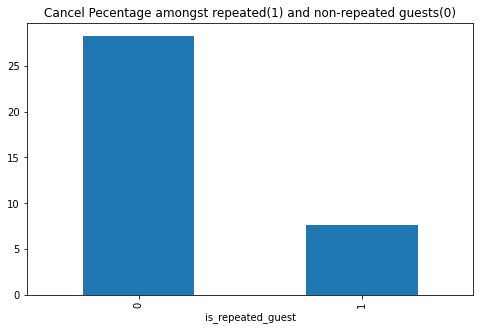

In [83]:
tbl.drop('All',axis=0)['cancel_percent'].plot.bar()
plt.title('Cancel Pecentage amongst repeated(1) and non-repeated guests(0)')
plt.show()

###### We see that non repeated guests have a higher rate of cancellation compared to repeated guests.¶

###### Column: previous_cancellations

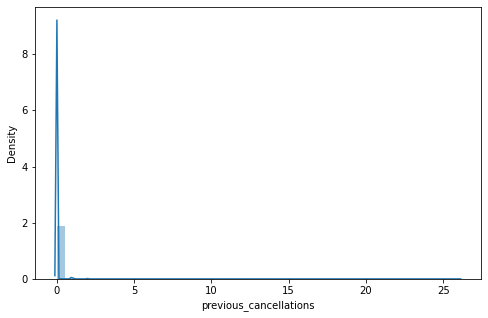

In [84]:
sns.distplot(df.previous_cancellations)
plt.show()

###### We see that most of the customers do not have any previous cancellations. This could also be because most of the customers are non-repeated guests. We also observe records where with a higher number of previous cancellations.

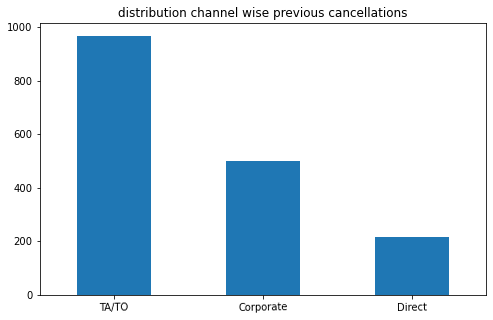

In [85]:
df.loc[df.previous_cancellations>0]['distribution_channel'].value_counts().plot.bar()
plt.title('distribution channel wise previous cancellations')
plt.xticks(rotation=True)
plt.show()

###### We see that the highest number of previous cancellations are from travel agents and tour operators. This indicates that travel agents and tour operators have a habit of bulk booking and reserving the rooms before approaching travellers.

###### Column: previous_bookings_not_cancelled

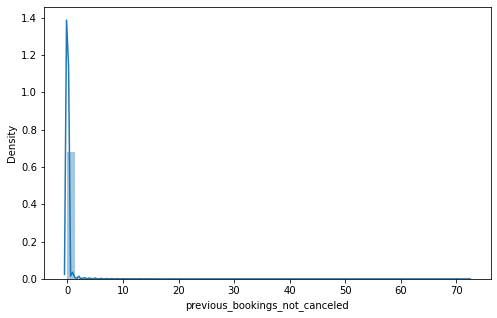

In [86]:
sns.distplot(df.previous_bookings_not_canceled)
plt.show()

###### From the above density plot we see that most of the bookings are of customers with 0 previous cancellations. There records indicating higher numbers. We would explore them furthe

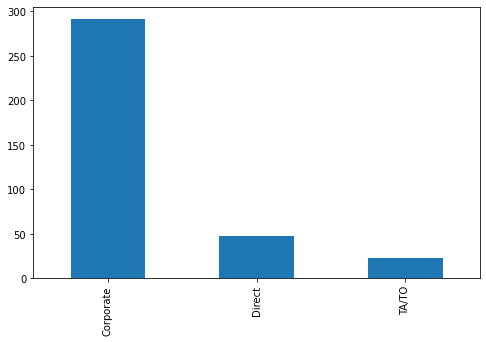

In [87]:

df.loc[df.previous_bookings_not_canceled>10]['distribution_channel'].value_counts().plot.bar()
plt.show()

###### We see that amongst the booking with higher number non-cancelled previous bookings most of them are from the corporate sector. It seems that the hotel reserves bookings under the corporate name but considers the individuals representing these corporates as seperate guests when considering they are repeated guests or not. Hence we see some corporate records with non-repeated guests but a a large number of non-cancelled previous bookings

###### column:REserved room type

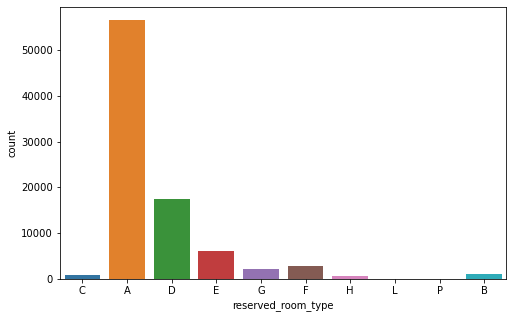

In [88]:
sns.countplot(x='reserved_room_type',data=df)
plt.show()

###### We see that hotel room of type A seems to be the most commonly booked room type. This room could be the most economical room type available at the hotels. We also see that there are very few records of room type L and P. These rooms could be luxury rooms and luxury suites.

In [89]:
tbl=pd.crosstab(df.reserved_room_type,df.is_canceled,margins=True)
tbl

is_canceled,0,1,All
reserved_room_type,,,
A,41850,14684,56534
B,681,318,999
C,619,296,915
D,12162,5236,17398
E,4399,1648,6047
F,1972,851,2823
G,1315,737,2052
H,353,243,596
L,4,2,6


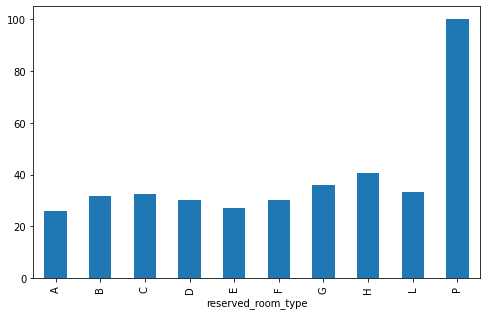

In [90]:
tbl['cancel_percent']=tbl[1]*100/tbl['All']
tbl.drop('All',axis=0)['cancel_percent'].plot.bar()
plt.show()

###### We see that room type P has the highest cancellation rate. But P and L have 12 records together. Among Others H seems to be having the highest cancellation percentage. We also draw a similar inference from assigned room type

In [91]:
# Number of records where assigned room type was not same as reserved room type
df.loc[df.reserved_room_type!=df.assigned_room_type].shape

(13105, 31)

###### We see that there are 13,106 bookings where the customers were not able to get their reserved room type This indicates the presence of overbooking in the case of these hotels

###### column:Booking changes

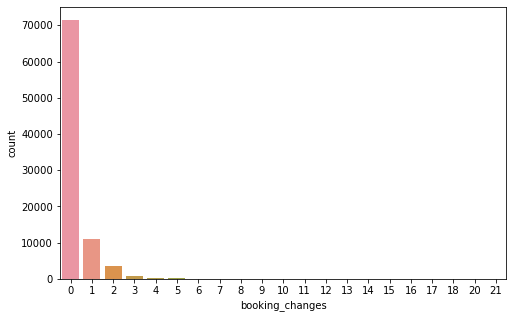

In [92]:
sns.countplot(x='booking_changes',data=df)
plt.show()

###### We see that most records do not make any kind of booking changes to their reservations. There are records with a high number of booking changes.

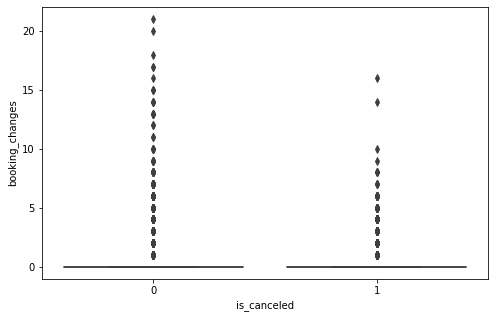

In [93]:
sns.boxplot(x='is_canceled',y='booking_changes',data=df)
plt.show()

###### we se taht non-cancelled booking have a higher number of booking changes

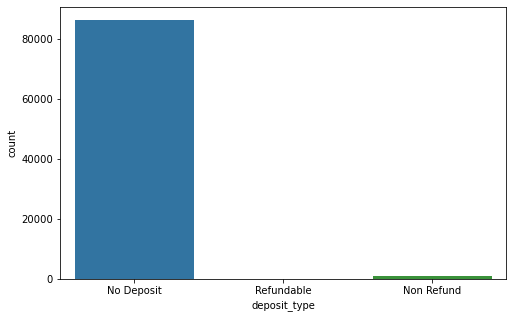

In [94]:
sns.countplot(x='deposit_type',data=df)
plt.show()

###### We see that most of the bookings have been made with no deposits, with very few bookings made refundable and non-refundable

In [95]:
tbl=pd.crosstab(df.deposit_type,df.is_canceled,margins=True)
tbl

is_canceled,0,1,All
deposit_type,,,
No Deposit,63219,23012,86231
Non Refund,55,983,1038
Refundable,81,26,107
All,63355,24021,87376


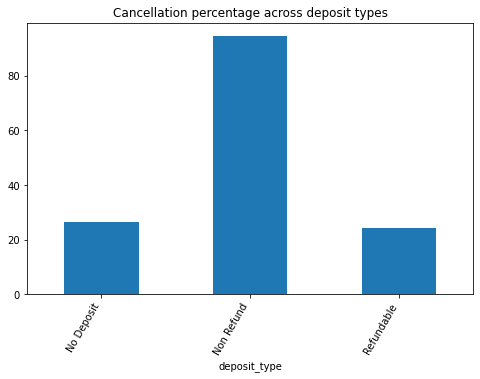

In [96]:
tbl['cancel_percent']=tbl[1]*100/tbl['All']
tbl.drop('All',axis=0)['cancel_percent'].plot.bar()
plt.xticks(rotation=60,ha='right')
plt.title('Cancellation percentage across deposit types')
plt.show()


###### From the above analysis of the column we infer that, absurdly there is a huge percentage of cancellations in bookings done on non-refundable deposit types.
To investigate, Exploring Cancellation Drivers to Gain Insights Into Booking Cancellation Behavior.
1: We found out that when analysing the deposit type columns with the country of origins, a trend could be found. Most of these records of Asiatic and African countries where Non-refundable deposit type was mentioned happened to be done through OTA using false or invalid credit card details. These bookings are issued as support for requests for visas to enter the country (a hotel booking is mandatory for applying for a Portuguese entry visa).
To quote from the paper itself: "As an example, through analysis of the “Nonrefundable” (DepositType) canceled bookings in some Asiatic countries (Country) and from certain distribution channels (DistributionChannel and Agent), it is possible to understand why so many “Nonrefundable” bookings are canceled. These bookings are usually made through OTA using false or invalid credit card details. These bookings are issued as support for requests for visas to enter the country (a hotel booking is mandatory for applying for a Portuguese entry visa).After failing to charge the customer’s credit card, the hotel identifies these bookings as “fake” and contacts the customer; however, during the time required to verify these bookings, they contribute negatively to demand forecast and demand-management decisions."

###### column :Agent

In [97]:
df.agent.value_counts()


Agent       75187
no agent    12189
Name: agent, dtype: int64

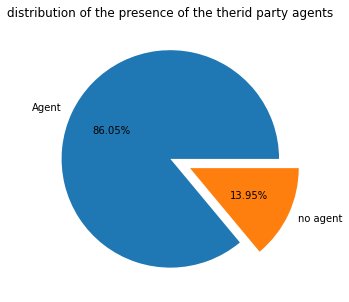

In [98]:
plt.pie(x=df.agent.value_counts().values,labels=df.agent.value_counts().index,explode=[0,0.2],autopct='%.2f%%')
plt.title('distribution of the presence of the therid party agents')
plt.show()

###### We see that 86% bookings were done through third party agents while only 13% bookings were done through other sources. This is quite obvious with the strong presence of tour operators and travel agents, indicated by the distribution of market_segment and distribution channel columns

In [99]:
tbl=pd.crosstab(df.agent,df.is_canceled,margins=True)
tbl

is_canceled,0,1,All
agent,,,
Agent,52723,22464,75187
no agent,10632,1557,12189
All,63355,24021,87376


In [100]:
tbl['cancel_percent']=tbl[1]*100/tbl['All']
tbl

is_canceled,0,1,All,cancel_percent
agent,,,,
Agent,52723,22464,75187,29.877505
no agent,10632,1557,12189,12.773812
All,63355,24021,87376,27.491531


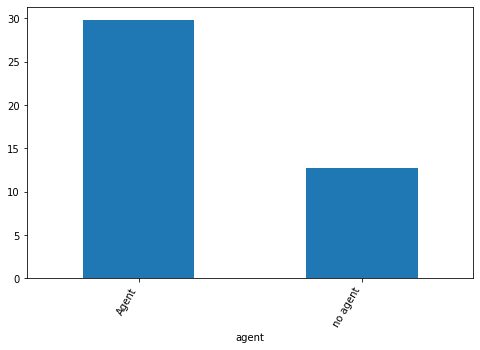

In [101]:
tbl.drop('All',axis=0)['cancel_percent'].plot.bar()
plt.xticks(rotation=60,ha='right')
plt.show()

###### We see that the cancellation percentage is considerable higher in bookings made through third party agents compared to direct bookings

###### Column: customer_type

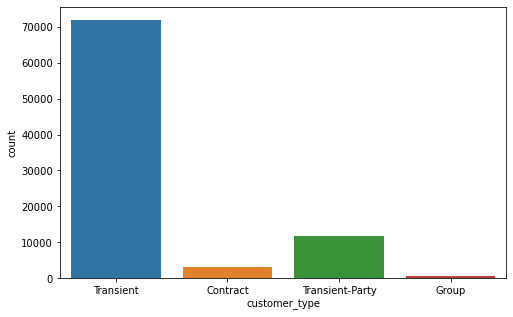

In [102]:
sns.countplot(x='customer_type',data=df)
plt.show()

###### We see that most number of bookings are from transient customers, meaning they are staying for less than 30 consecutive days

column:adr(Average daily rate)

<AxesSubplot:xlabel='adr', ylabel='Density'>

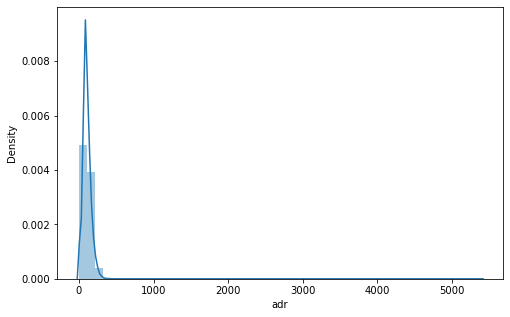

In [103]:
sns.distplot(df.adr)

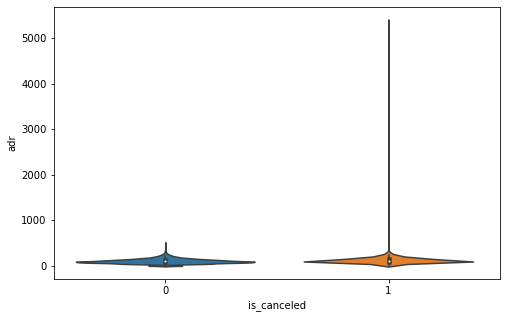

In [104]:
sns.violinplot(x='is_canceled',y='adr',data=df)
plt.show()

###### We notice that there are similar trends in cancelled and non-cancelled bookings, with the max adr being registered in cancelled bookings

###### Column: required Car parking spaces

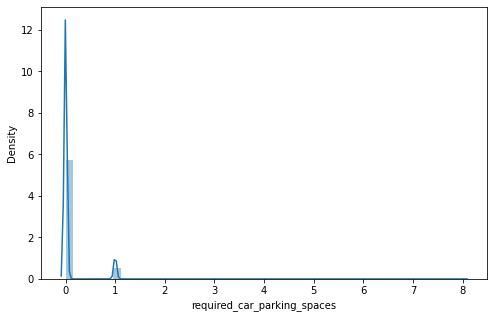

In [105]:
sns.distplot(df.required_car_parking_spaces)
plt.show()

###### we notice that most of the records require no or amost 1 car parking spaces, though there are records that show more number of parking spaces. this could be families travelling togehter and larger business and larger business trips.

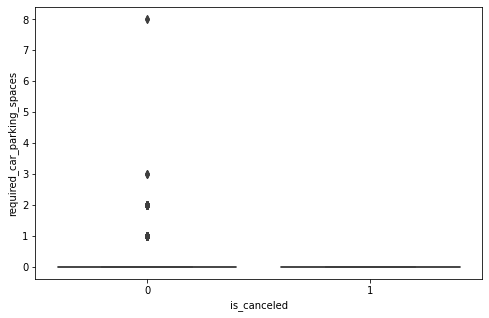

In [106]:
sns.boxplot(x='is_canceled',y='required_car_parking_spaces',data=df)
plt.show()

###### Column: Total of special requests

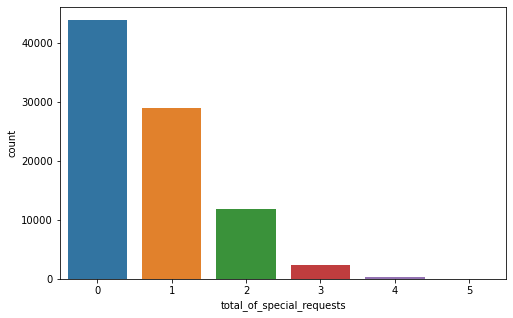

In [107]:
sns.countplot(x='total_of_special_requests',data=df)
plt.show()

###### We see that most number of people do not make any kind of special requests for their bookings. Usually, if any special requests are made, they are limited to 1 or 2 special requests. There are records though which show the number of special requests being as 4 or 5

In [108]:
tbl=pd.crosstab(df.total_of_special_requests,df.is_canceled,margins=True)
tbl

is_canceled,0,1,All
total_of_special_requests,,,
0,29310,14571,43881
1,22509,6502,29011
2,9296,2515,11811
3,1920,397,2317
4,286,34,320
5,34,2,36
All,63355,24021,87376


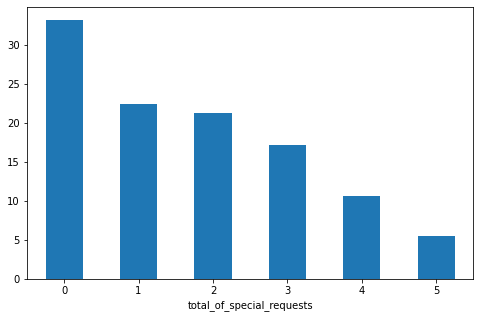

In [109]:
tbl['cancel_percent']=tbl[1]*100/tbl['All']
tbl.drop('All',axis=0)['cancel_percent'].plot.bar()
plt.xticks(rotation=0)
plt.show()

###### From above we see that the more number of special requests a customer makes less likely he is to cancel his booking

## Conclusion From the Exploratory Data Analysis

###### We saw that there was 23% cancellation rate in Resort hotel vs around 30% cancellation rate across City Hotel. This could indicate the presence of overbooking in City Hotel. Management insights need to be taken to identify the cause and steps need to be taken accordingly.



We observed that bookings with higher estimated lead time, on average, have a higher chance of cancellation. Steps to be extra vigilant towards longer leadt time bookings need to be taken .

We observed that the cancellation rates have consistently increased with each passing year. There is clearly some kind of customer disatisfaction. Customer feedback could be taken to adress these issues.

Both the hotels need to focus on the months of July and August, these 2 months have the highest number of bookings out of all months. Discounts and and offers could be given to avoid customers cancelling their bookings in these months.

We see that most people order for a Bed and Breakfast meal package. Very few people go for a full board meal package. This could indicate the presence of popular restaurents around the hotels. A large number of people have ordered a no meal package as well.

Most of the bookings seem to be from European countries. We could focus more on these to reduce the number of cancellations.

We observed that most of the bookings are made through Online Travel Agents. Contacting said travel agents and setting up contracts between the hotel and these agents could be a very profitable move.

We also need to dwelve into reasons to check why there are so few repeated guests in the hotels.

We see that the cancellation percentage of a non-repeated guests is considerably higher compared to a repeated guest. This could indicate a lowern customer statisfaction. Customer feedback is again the best option here.

More vigilant inspections should be made towards non-refundable deposit types, becaue of the false details given to them for entry visas.

Transient bookings seem to be the most frequent in number.

We see that non-cancelled bookings required more number of car parking spaces compared to cancelled bookings.

# Statistical Tests

###### We will be doing some statistical tests to confirm or disregard some of our assumptions about the data. The significance level for all the test would be taken as 0.05

##### Column Hotel

###### Column: hotel
Null Hypothesis: The cancellation rate across both types of hotels is equal.

Alternate Hypothesis: The cancellation rate across both types of hotels is unequal

In [117]:
# For this test we will be using chi2_contingency test
# First we need to create the required crosstab
tbl=pd.crosstab(df.hotel,df.is_canceled)
tbl

is_canceled,0,1
hotel,,
City Hotel,37371,16047
Resort Hotel,25984,7974


In [118]:
# Statistical test
statistic,pvalue,dof,expected=stats.chi2_contingency(tbl)
print('Pvalue of the test=',pvalue)

Pvalue of the test= 2.3421426534811967e-99


###### We see that the pvalue for our test is extremely small compared to our significance level. Hence, we have to reject our null hypothesis. In conclusion, the rate of cancellation across both types hotels is different

###### Column: lead_time

###### Null Hypothesis: The average lead time across cancelled and non cancelled bookings is equal
Alternate Hypothesis: The average lead time across cancelled and non cancelled bookings is unequa

In [119]:
# For this test we would be using two sample t-test(independent)
# For this we need to create two different samples, one for cancelled bookings and one for non-cancelled bookings
cancelled_sample=df.loc[df.is_canceled==1,'lead_time']
non_cancelled_sample=df.loc[df.is_canceled==0,'lead_time']

In [120]:
# Statistical test
print('Pvalue for our test=',stats.ttest_ind(cancelled_sample,non_cancelled_sample)[1])

Pvalue for our test= 0.0


###### We see that the pavlue for our test is zero. Hence, we have to reject our null hypothesis. In conclusion, the lead time across both cancelled and non-cancelled bookings is different on average

###### Null Hypothesis: The average lead time across both types of hotels is equal
    

###### Alternate Hypothesis: The average lead time across both types of hotels in unequal

In [121]:
# For this test we would be using independent 2 sample ttest
# For this we need to create two samples one for resort hotel and one for city hotel
city_sample=df.loc[df.hotel=='City Hotel','lead_time']
resort_sample=df.loc[df.hotel=='Resort Hotel','lead_time']

In [122]:
print('Pvalue for our test=',stats.ttest_ind(city_sample,resort_sample)[1])

Pvalue for our test= 1.0623622333005708e-21


###### We see that the pvalue for our test is extremely small compared to our significance level. Hence, we have to reject our null hypothesis. In conclusion, the average lead time is unequal across both types of hotels

# Column: customer_type

#### Null hypothesis: The rate of cancellation is equal across all customer types
Alternate Hypothesis: The rate of cancellation is unequal across all customer types

In [124]:
# For this test we would be using the chi2_contingency test
# For this we need to makew the required crosstab
tbl=pd.crosstab(df.customer_type,df.is_canceled)
tbl

is_canceled,0,1
customer_type,,
Contract,2627,512
Group,490,54
Transient,50302,21668
Transient-Party,9936,1787


In [125]:
statistic,pvalue,dof,exp=stats.chi2_contingency(tbl)

print('The Pvalue for the given test=',pvalue)

The Pvalue for the given test= 1.7526923826279267e-305


###### We see that the pvalue for the given test is extremely small compared to our significance level. Thus we have to reject our null hypothesis. In conclusion, the rate of cancellation across all customer types is unequal.

###### Column: adr
Null Hypothesis: The average daily rate is equal across cancelled and non-cancelled bookings

Alternate Hypothesis: The average daily rate is unequal across cancelled and non-cancelled bookings

In [127]:
# For this test we would be using the independent 2-sample ttest
# For this we need to create two samples, one for cancelled and the other for non-cancelled
cancelled_samp=df.loc[df.is_canceled==1,'adr']
non_cancelled_samp=df.loc[df.is_canceled==0,'adr']
print('Pvalue for the given test is=',stats.ttest_ind(cancelled_samp,non_cancelled_samp)[1])

Pvalue for the given test is= 0.0


###### We see that the pvalue for the given test is coming out to be zero. Hence, we have to reject our null hypothesis. In conclusion, the average daily rate is unequal across cancelled and non-cancelled bookings

###### Column: required_car_parking_spaces
Null Hypothesis: The average number of required car parking spaces is equal across cancelled and non-cancelled bookings

Alternate Hypothesis: The average number of required car parking spaces is unequal across cancelled and non-cancelled bookings¶

In [128]:
# For this test we would be using the independent 2-sample ttest
# For this we need to create two samples, one for cancelled and the other for non-cancelled
cancelled_samp=df.loc[df.is_canceled==1,'required_car_parking_spaces']
non_cancelled_samp=df.loc[df.is_canceled==0,'required_car_parking_spaces']
print('Pvalue for the given test is=',stats.ttest_ind(cancelled_samp,non_cancelled_samp)[1])

Pvalue for the given test is= 0.0


###### We see that the pvalue for the given test coming out to be zero. Hence we have to reject our null hypothesis. In conclusion, the average number of required car parking spaces in unequal across cancelled and non-cancelled bookings

In [133]:
cats=['hotel','arrival_date_year','arrival_date_month','arrival_date_week_number','arrival_date_day_of_month',
     'meal','country','market_segment','distribution_channel','is_repeated_guest','reserved_room_type','assigned_room_type',
     'deposit_type','agent','customer_type']
stat_df_cat=pd.DataFrame()
stat_df_cat['Feature']=cats
lst=[]

for i in cats:
    tbl=pd.crosstab(df[i],df.is_canceled)
    statistic,pvalue,dof,exp=stats.chi2_contingency(tbl)
    lst.append(pvalue)
stat_df_cat['Pvalue']=lst
stat_df_cat

,Feature,Pvalue
0,hotel,2.342143e-99
1,arrival_date_year,3.706993e-148
2,arrival_date_month,3.378382e-130
3,arrival_date_week_number,3.818078e-124
4,arrival_date_day_of_month,7.366615e-05
5,meal,1.165355e-74
6,country,1.014438e-57
7,market_segment,0.000000e+00
8,distribution_channel,0.000000e+00
9,is_repeated_guest,1.509488e-154


In [135]:
lst=[]
for i in stat_df_cat.Pvalue:
    if i>0.05:
        lst.append('Not Significant')
    else:
        lst.append('Significant')
stat_df_cat['Significance']=lst
stat_df_cat

,Feature,Pvalue,Significance
0,hotel,2.342143e-99,Significant
1,arrival_date_year,3.706993e-148,Significant
2,arrival_date_month,3.378382e-130,Significant
3,arrival_date_week_number,3.818078e-124,Significant
4,arrival_date_day_of_month,7.366615e-05,Significant
5,meal,1.165355e-74,Significant
6,country,1.014438e-57,Significant
7,market_segment,0.000000e+00,Significant
8,distribution_channel,0.000000e+00,Significant
9,is_repeated_guest,1.509488e-154,Significant


In [136]:
nums=df.select_dtypes(np.number).drop(columns=['is_canceled','arrival_date_week_number','arrival_date_day_of_month',
                                         'is_repeated_guest']).columns
stat_df=pd.DataFrame()
stat_df['Feature']=nums
lst=[]
for i in nums:
    cancelled=df.loc[df.is_canceled==1,i]
    notcancelled=df.loc[df.is_canceled==0,i]
    lst.append(stats.ttest_ind(cancelled,notcancelled)[1])
stat_df['Pvalue']=lst

In [137]:
lst=[]
for i in stat_df.Pvalue:
    if i>0.05:
        lst.append('Not Significant')
    else:
        lst.append('Significant')
stat_df['Significance']=lst

In [139]:
stat_df

,Feature,Pvalue,Significance
0,lead_time,0.000000e+00,Significant
1,stays_in_weekend_nights,5.248588e-71,Significant
2,stays_in_week_nights,4.600749e-133,Significant
3,adults,1.841891e-129,Significant
4,babies,6.547958e-10,Significant
5,previous_cancellations,2.453025e-52,Significant
6,previous_bookings_not_canceled,1.039881e-53,Significant
7,booking_changes,1.962477e-169,Significant
8,days_in_waiting_list,1.871977e-01,Not Significant
9,adr,0.000000e+00,Significant


###### We see that the pvalue for the given test is extremely small compared to our significance level. Hence we have to reject the null hypothesis. In conclusion, the average number of special requests is unequal across cancelled and non-cancelled bookings

## Feature Selection and Engineering

###### We observed that out of all the features we have one insignificant feature namely, days in waiting list, So we would drop this variable from our model bulding
df.drop(columns='days_in_waiting_list',inplace=True)

In [141]:
df.drop(columns='days_in_waiting_list',inplace=True)

KeyError: "['days_in_waiting_list'] not found in axis"

In [142]:
# We also have two post-event columns, reservation_status and reservation_status_date
# To make a robust model we would have to drop these two columns as well
df.drop(columns=['reservation_status','reservation_status_date'],inplace=True)

In [143]:
# Creating a new feature total_stay
df['total_stay']=df.stays_in_week_nights+df.stays_in_weekend_nights
df.drop(columns=['stays_in_week_nights','stays_in_weekend_nights'],inplace=True)

In [144]:
# Creating a new column party_size
df['party_size']=df.adults+df.children+df.babies
df.drop(columns=['adults','children','babies'],inplace=True)

TypeError: unsupported operand type(s) for +: 'int' and 'str'

# Base Model

In [145]:
# Before Procedding to our Base model building we would make an evaluation function that would help us evaluating the
# models with different metrics

def evaluation(y_test,y_pred):
    
    print('Accuracy Score:',accuracy_score(y_test,y_pred))
    print('f1_score:',f1_score(y_test,y_pred))
    print('Precision:',precision_score(y_test,y_pred))
    print('Recall:',recall_score(y_test,y_pred))
    print('Classification report:\n',classification_report(y_test,y_pred))
    cm=confusion_matrix(y_test,y_pred)
    ConfusionMatrixDisplay(cm).plot()
    plt.title('Confusion matrix for the given prediction')
    plt.show()
    
# Our evaluation fucntion is now created

In [146]:
# Splitting the data
dummy=pd.get_dummies(df_temp,drop_first=True)
x=dummy.drop(columns='is_canceled')
y=dummy.is_canceled
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,stratify=y,random_state=10)

NameError: name 'df_temp' is not defined

In [147]:
rf=RandomForestClassifier()
base_model=rf.fit(x_train,y_train)
y_pred=base_model.predict(x_test)
# Train evaluation
evaluation(y_train,base_model.predict(x_train))

NameError: name 'x_train' is not defined

#### Conclusion from Model Building
We were able to build a robust model that wasn't overfitting towards the data.

We got a recall score of 0.84 and an accuracy of 0.74 on the test data.

From a business perspective if a booking is flagged as a cancellable booking we could send the customer an e-mail to confirm their booking. If they are not able confirm the booking would be deemed cancelled and the customer has to reserve a new booking. This would ensure a more vigilant booking method on part of the hotel and would also reduct the number of false bookings.

Since we were working here with a limited amount of data there is a pretty good chance of model decay in the future. To counter this, periodic remodelling and configuring of the model would be required.

For production, the process(mentioned in the third point) could be automated to reduce the workload on hotel staff and management.
